## Viewing Results

In [1]:
import os
import scanpy as sc

home = '/home/kojo/Code/Alz_trVAE'
os.chdir(home)

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from scipy import sparse
from scipy import stats
from matplotlib import pyplot as plt
import reptrvae

Using TensorFlow backend.


In [3]:
sc.set_figure_params(dpi=200)

In [4]:
path_to_save = "./results/alzPro-time/"
sc.settings.figdir = path_to_save

In [5]:
combination = 'U'
normalized = False
specific_cell_type = "all"

In [6]:
conditions = ["3m", "6m", "9m"]
source_condition = "6m"
target_condition = "9m"
cell_type_key = "Group"
condition_key = "Timepoint"

In [7]:
adata = sc.read(f"./data/alzPro_{'normalized' if normalized else 'count'}_{combination}.h5ad")
#adata.uns['log1p']["base"] = None
adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [8]:
adata.X.min(), adata.X.max()

(0.0, 443000000.0)

In [9]:
if specific_cell_type != 'all':
    cell_type_adata = adata[adata.obs[cell_type_key] == specific_cell_type]
else:
    cell_type_adata = adata
#cell_type_adata.uns['log1p']["base"] = None
cell_type_adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [10]:
cell_type_adata.X[0][1550]

429000.0

In [11]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == source_condition]
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]

In [12]:
ctrl_adata.obs['method'] = source_condition
real_adata.obs['method'] = target_condition

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


In [13]:
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPro-time/{specific_cell_type}_{source_condition}_to_{target_condition}_{'norm' if normalized else 'count'}_{combination}.h5ad")
#trvae_reconstructed.uns['log1p']["base"] = None
trvae_reconstructed

AnnData object with n_obs × n_vars = 32 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [14]:
trvae_reconstructed.X[0][1550]

391467.62

In [15]:
trvae_reconstructed.X[:8].min(), trvae_reconstructed.X[:8].max()

(0.0, 32289458.0)

In [16]:
trvae_reconstructed.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
16-0,2997,M,all,6m_to_9m,Test,0
17-0,2998,M,all,6m_to_9m,Train,0
18-0,3003,F,all,6m_to_9m,Test,0
19-0,3011,F,all,6m_to_9m,Test,0
20-0,3012,F,all,6m_to_9m,Train,0
21-0,3013,F,all,6m_to_9m,Train,0
22-0,3121,M,all,6m_to_9m,Train,0
23-0,3177,F,all,6m_to_9m,Train,0
24-0,3325,M,all,6m_to_9m,Train,0
25-0,3392,M,all,6m_to_9m,Test,0


In [17]:
trvae_pred = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == f"{source_condition}_to_{target_condition}"]
trvae_pred.var = ctrl_adata.var
trvae_pred.obs['method'] = 'trVAE'

In [18]:
trvae_pred.obs

,Qi ID,sex,Group,Timepoint,Validation,batch,method
16-0,2997,M,all,6m_to_9m,Test,0,trVAE
17-0,2998,M,all,6m_to_9m,Train,0,trVAE
18-0,3003,F,all,6m_to_9m,Test,0,trVAE
19-0,3011,F,all,6m_to_9m,Test,0,trVAE
20-0,3012,F,all,6m_to_9m,Train,0,trVAE
21-0,3013,F,all,6m_to_9m,Train,0,trVAE
22-0,3121,M,all,6m_to_9m,Train,0,trVAE
23-0,3177,F,all,6m_to_9m,Train,0,trVAE
24-0,3325,M,all,6m_to_9m,Train,0,trVAE
25-0,3392,M,all,6m_to_9m,Test,0,trVAE


In [19]:
models = ctrl_adata.concatenate(real_adata, trvae_pred)
models.obs['method'].unique()

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


array(['6m', '9m', 'trVAE'], dtype=object)

In [20]:
models.var_names

Index(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', 'A2A7S8|K1522',
       'A2A8L1|CHD5', 'A2A8L5|PTPRF', 'A2ADY9|DDI2', 'A2AG50|MA7D2',
       'A2AGT5|CKAP5', 'A2AJA9|AJM1',
       ...
       'Q9Z2U0|PSA7', 'Q9Z2U1|PSA5', 'Q9Z2U2|ZN292', 'Q9Z2V5|HDAC6',
       'Q9Z2W0|DNPEP', 'Q9Z2W8|GRIA4', 'Q9Z2W9|GRIA3', 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'],
      dtype='object', name='Accession', length=2969)

In [21]:
sc.tl.rank_genes_groups(models, reference=target_condition, 
                       groupby="method", groups=['trVAE'],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(models, reference='trVAE',
                         groupby="method", groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = models.uns['up_reg_genes']['names']['trVAE']
down_genes = models.uns['down_reg_genes']['names'][target_condition]

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9


In [22]:
models.obs

,Qi ID,sex,Group,Timepoint,Validation,method,batch
16-0,2997,M,HET,6m,Test,6m,0
17-0,2998,M,HET,6m,Train,6m,0
18-0,3003,F,WT,6m,Test,6m,0
19-0,3011,F,HET,6m,Test,6m,0
20-0,3012,F,HET,6m,Train,6m,0
21-0,3013,F,HET,6m,Train,6m,0
22-0,3121,M,HET,6m,Train,6m,0
23-0,3177,F,HET,6m,Train,6m,0
24-0,3325,M,HET,6m,Train,6m,0
25-0,3392,M,WT,6m,Test,6m,0


In [23]:
protein_up = up_genes[0]
print(protein_up)

O35326|SRSF5


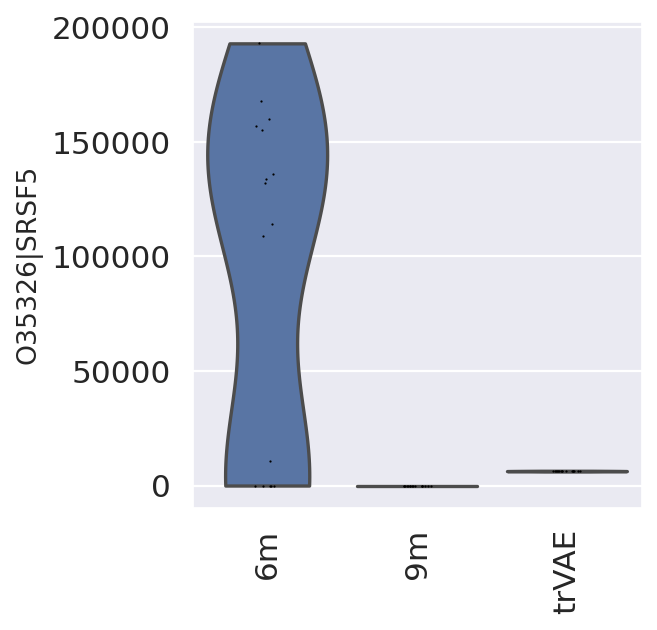

In [24]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_best_model_cmpr.pdf",
             jitter=True,
            )

In [25]:
protein_down = down_genes[0]
print(protein_down)

Q9D2N9|VP33A


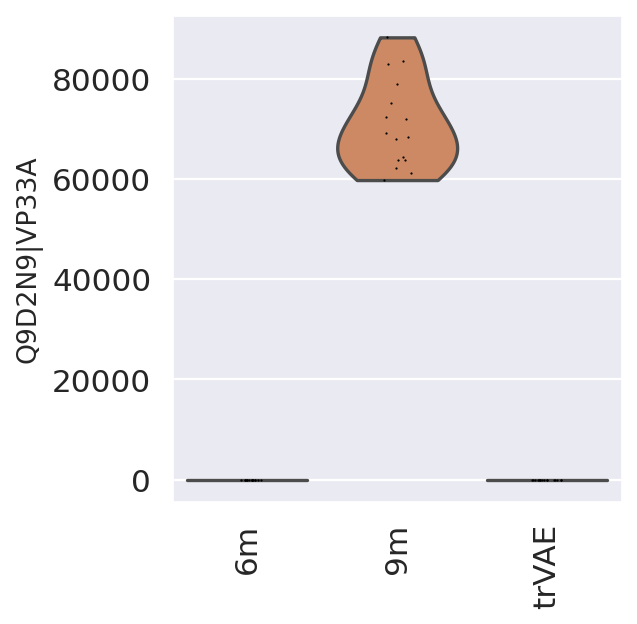

In [26]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_worst_model_cmpr.pdf",
             jitter=True,
            )

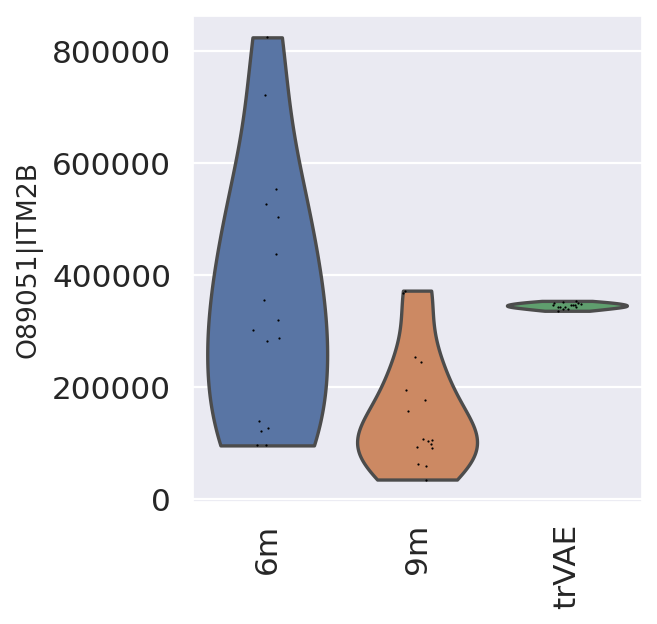

In [27]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="O89051|ITM2B", 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_model_cmpr.pdf",
             jitter=True,
            )

### R^2 Plots

In [28]:
adata_pred = ctrl_adata.concatenate(real_adata, trvae_pred)
#adata_pred.uns['log1p']["base"] = None
adata_pred

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'method', 'batch'

In [29]:
adata_pred.obs[condition_key].unique()

array(['6m', '9m', '6m_to_9m'], dtype=object)

In [30]:
#"""
sc.tl.rank_genes_groups(cell_type_adata, reference=target_condition, 
                       groupby=condition_key, groups=[source_condition],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(cell_type_adata, reference=source_condition,
                         groupby=condition_key, groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = cell_type_adata.uns['up_reg_genes']['names'][source_condition]
down_genes = cell_type_adata.uns['down_reg_genes']['names'][target_condition]
#"""

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9


In [31]:
up_genes_pairs = {}
for i in range(50):
    up_genes_pairs[cell_type_adata.uns['up_reg_genes']['names'][source_condition][i]] = cell_type_adata.uns['up_reg_genes']['scores'][source_condition][i]
up_genes_pairs

{'Q01097|NMDE2': 41.591423,
 'P61164|ACTZ': 39.956116,
 'Q56A07|SCN2B': 39.885284,
 'O88952|LIN7C': 38.51641,
 'Q6P1F6|2ABA': 38.34731,
 'O55023|IMPA1': 37.73783,
 'Q8R0S2|IQEC1': 36.89391,
 'Q8C3Q5|SHSA7': 36.885574,
 'P61089|UBE2N': 35.905865,
 'Q9D819|IPYR': 35.058277,
 'Q9CQZ6|NDUB3': 33.88959,
 'P10854|H2B1M': 33.730568,
 'Q5SQX6|CYFP2': 33.67151,
 'Q8BSS9|LIPA2': 33.096382,
 'Q8VEA4|MIA40': 32.891235,
 'Q9CQV1|TIM16': 32.86443,
 'P10852|4F2': 32.314686,
 'P14206|RSSA': 32.17599,
 'Q9CR16|PPID': 32.142548,
 'Q8BNW9|KBTBB': 31.972828,
 'P25444|RS2': 31.610193,
 'P35980|RL18': 31.517464,
 'Q8BGU5|CCNY': 31.242897,
 'Q62167|DDX3X': 31.159216,
 'O70161|PI51C': 31.015575,
 'P63073|IF4E': 31.009676,
 'P35585|AP1M1': 30.751175,
 'Q60597|ODO1': 30.61327,
 'P84089|ERH': 30.391794,
 'O08539|BIN1': 30.366972,
 'P10639|THIO': 30.271925,
 'P12970|RL7A': 30.173018,
 'P05202|AATM': 30.10815,
 'Q9D8N0|EF1G': 30.10439,
 'P34022|RANG': 30.086342,
 'A2ASS6|TITIN': 30.077276,
 'Q8C8R3|ANK2': 30.06203

In [32]:
down_genes_pairs = {}
for i in range(50):
    down_genes_pairs[cell_type_adata.uns['down_reg_genes']['names'][target_condition][i]] = cell_type_adata.uns['down_reg_genes']['scores'][target_condition][i]
down_genes_pairs

{'Q9D2N9|VP33A': 32.527325,
 'Q8CD54|PIEZ2': 26.967579,
 'Q9CZ04|CSN7A': 26.17775,
 'P61082|UBC12': 25.798862,
 'Q8R1T1|CHMP7': 25.777678,
 'Q9CXR1|DHRS7': 25.120735,
 'P27048|RSMB': 24.464945,
 'Q8VBX6|MPDZ': 23.508322,
 'Q8CG79|ASPP2': 23.301159,
 'Q9QUJ7|ACSL4': 22.66911,
 'P62267|RS23': 22.655878,
 'P23492|PNPH': 22.612816,
 'E9Q414|APOB': 22.169876,
 'Q8CH72|TRI32': 21.972157,
 'Q6ZPE2|MTMR5': 21.909649,
 'P61957|SUMO2': 21.536037,
 'Q6ZQ88|KDM1A': 21.529732,
 'Q99LD9|EI2BB': 21.446217,
 'Q6ZWR6|SYNE1': 21.33743,
 'Q8C754|VPS52': 21.321453,
 'Q9R069|BCAM': 21.24043,
 'P61961|UFM1': 21.157074,
 'Q9Z2W0|DNPEP': 21.007875,
 'Q9DBZ5|EIF3K': 20.584621,
 'Q922B1|MACD1': 20.562544,
 'O88448|KLC2': 20.237333,
 'P23591|FCL': 20.214231,
 'Q9Z1R2|BAG6': 20.15505,
 'Q6ZWR4|2ABB': 20.10718,
 'O08989|RASM': 19.961535,
 'Q8CG70|P3H3': 19.958086,
 'Q9CRY7|GDPD1': 19.711088,
 'Q9QX60|DGUOK': 19.628939,
 'Q9CPQ1|COX6C': 19.601921,
 'Q8R5C5|ACTY': 19.57513,
 'Q60759|GCDH': 19.529715,
 'Q62241|RU1C':

In [33]:
top_genes = up_genes.tolist() + down_genes.tolist()

In [34]:
len(top_genes)

100

In [35]:
protein_up = up_genes[0]
print(protein_up)

Q01097|NMDE2


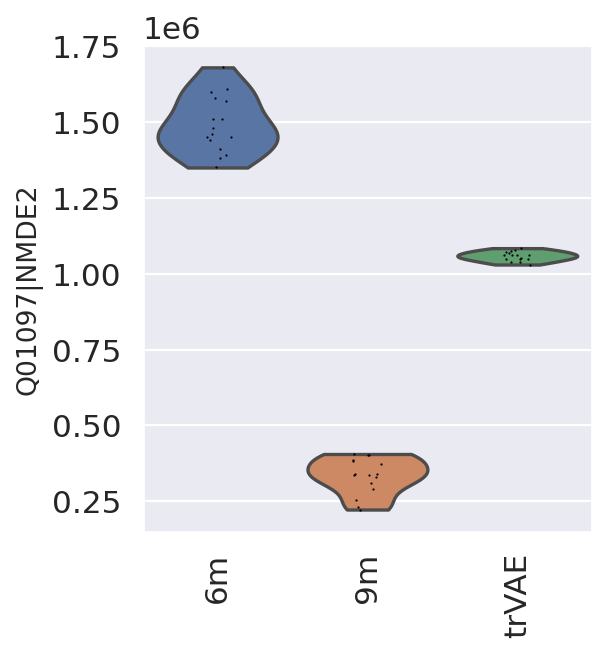

In [36]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_best_model_cmpr.pdf",
             jitter=True,
            )

In [37]:
protein_down = down_genes[0]
print(protein_down)

Q9D2N9|VP33A


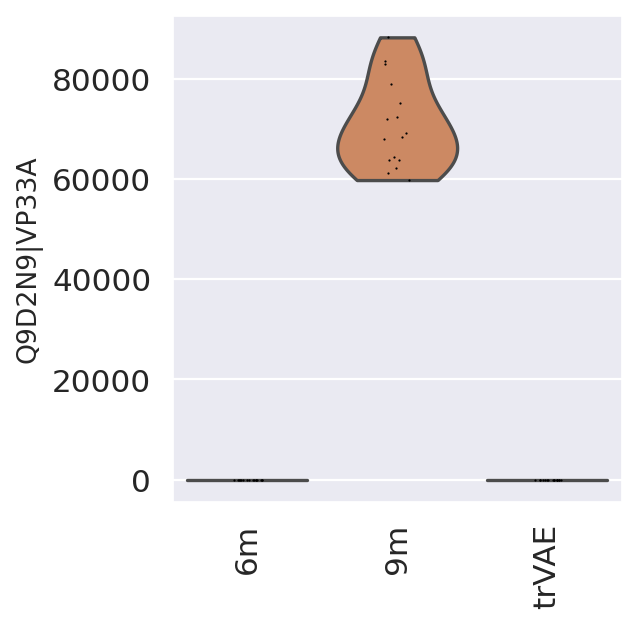

In [38]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_worst_model_cmpr.pdf",
             jitter=True,
            )

In [39]:
#top_genes = up_genes.tolist() + down_genes.tolist()

reg_mean_top100: 0.7290386925416178
reg_mean_all: 0.6952023118410459


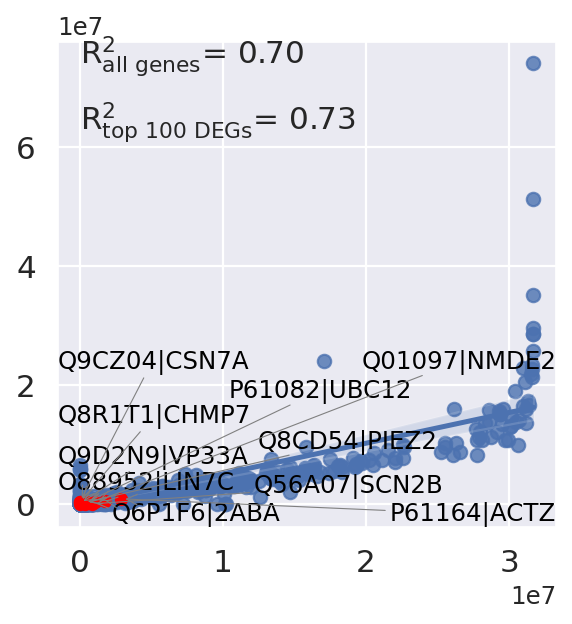

In [40]:
reptrvae.pl.reg_mean_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_{source_condition}_to_{target_condition}_{'normalized' if normalized else 'count'}_{combination}_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_top100: 0.8137605315281375
reg_var_all: 0.12901846845429196


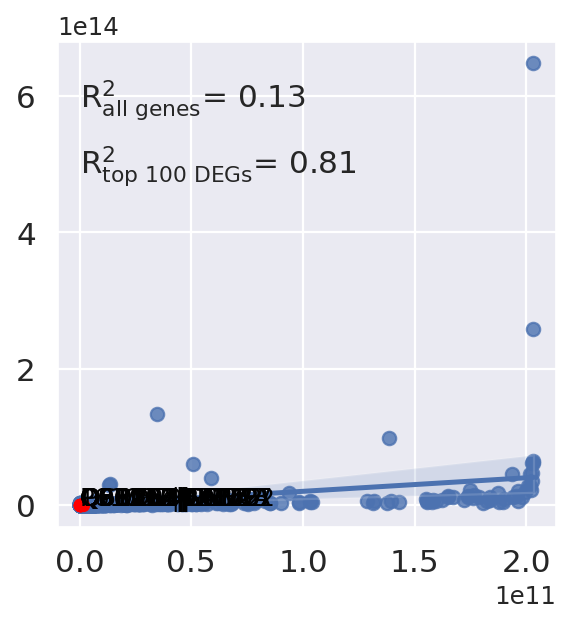

In [41]:
reptrvae.pl.reg_var_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_{source_condition}_to_{target_condition}_{'normalized' if normalized else 'count'}_{combination}_reg_var.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.1)

In [42]:
up_genes.tolist()

['Q01097|NMDE2',
 'P61164|ACTZ',
 'Q56A07|SCN2B',
 'O88952|LIN7C',
 'Q6P1F6|2ABA',
 'O55023|IMPA1',
 'Q8R0S2|IQEC1',
 'Q8C3Q5|SHSA7',
 'P61089|UBE2N',
 'Q9D819|IPYR',
 'Q9CQZ6|NDUB3',
 'P10854|H2B1M',
 'Q5SQX6|CYFP2',
 'Q8BSS9|LIPA2',
 'Q8VEA4|MIA40',
 'Q9CQV1|TIM16',
 'P10852|4F2',
 'P14206|RSSA',
 'Q9CR16|PPID',
 'Q8BNW9|KBTBB',
 'P25444|RS2',
 'P35980|RL18',
 'Q8BGU5|CCNY',
 'Q62167|DDX3X',
 'O70161|PI51C',
 'P63073|IF4E',
 'P35585|AP1M1',
 'Q60597|ODO1',
 'P84089|ERH',
 'O08539|BIN1',
 'P10639|THIO',
 'P12970|RL7A',
 'P05202|AATM',
 'Q9D8N0|EF1G',
 'P34022|RANG',
 'A2ASS6|TITIN',
 'Q8C8R3|ANK2',
 'Q60973|RBBP7',
 'P48678|LMNA',
 'P67871|CSK2B',
 'P60335|PCBP1',
 'Q62376|RU17',
 'Q9D1K7|CT027',
 'Q01320|TOP2A',
 'P80318|TCPG',
 'Q69ZT1|FAN1',
 'Q9DB77|QCR2',
 'Q924K8|MTA3',
 'P63005|LIS1',
 'Q9JME5|AP3B2']

In [43]:
down_genes.tolist()

['Q9D2N9|VP33A',
 'Q8CD54|PIEZ2',
 'Q9CZ04|CSN7A',
 'P61082|UBC12',
 'Q8R1T1|CHMP7',
 'Q9CXR1|DHRS7',
 'P27048|RSMB',
 'Q8VBX6|MPDZ',
 'Q8CG79|ASPP2',
 'Q9QUJ7|ACSL4',
 'P62267|RS23',
 'P23492|PNPH',
 'E9Q414|APOB',
 'Q8CH72|TRI32',
 'Q6ZPE2|MTMR5',
 'P61957|SUMO2',
 'Q6ZQ88|KDM1A',
 'Q99LD9|EI2BB',
 'Q6ZWR6|SYNE1',
 'Q8C754|VPS52',
 'Q9R069|BCAM',
 'P61961|UFM1',
 'Q9Z2W0|DNPEP',
 'Q9DBZ5|EIF3K',
 'Q922B1|MACD1',
 'O88448|KLC2',
 'P23591|FCL',
 'Q9Z1R2|BAG6',
 'Q6ZWR4|2ABB',
 'O08989|RASM',
 'Q8CG70|P3H3',
 'Q9CRY7|GDPD1',
 'Q9QX60|DGUOK',
 'Q9CPQ1|COX6C',
 'Q8R5C5|ACTY',
 'Q60759|GCDH',
 'Q62241|RU1C',
 'Q9DCM2|GSTK1',
 'O88986|KBL',
 'A2A7S8|K1522',
 'Q9D906|ATG7',
 'P24452|CAPG',
 'Q62523|ZYX',
 'Q9JIY5|HTRA2',
 'Q9D1Q6|ERP44',
 'Q8BHG2|CA123',
 'Q91VF2|HNMT',
 'Q04863|RELB',
 'P84244|H33',
 'Q9D0G0|RT30']